<a href="https://colab.research.google.com/github/yesyell/DA_School_1/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D/%EB%94%A5%EB%9F%AC%EB%8B%9D_%EA%B0%9C%EC%9A%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 기본적인 텐서 연산

In [ ]:
import tensorflow as tf

In [ ]:
# 상수로 텐서 만들기
a = tf.constant([1, 2, 3])
a

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3], dtype=int32)>

In [ ]:
# 0으로 채워진 텐서 만들기
b = tf.zeros([3, 3])
b

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)>

In [ ]:
# 산술 연산
x = tf.constant([1, 2, 3])
y = tf.constant([4, 5, 6])

x + y

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([5, 7, 9], dtype=int32)>

In [ ]:
# 텐서 형태 변경
x = tf.constant([[1, 2], [3, 4]])
y = tf.reshape(x, [4]) # 형태를 [4]로 변경
y

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([1, 2, 3, 4], dtype=int32)>

## 간단한 신경망 만들기

### 구성하기

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [ ]:
model = keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

**tf.keras** (tensorflow.keras)는 TensorFlow의 하이레벨 구현을 위한 **Keras API** 모듈입니다.

**tf.keras** 모듈의 **Sequential** 클래스는 Neural Network의 각 층을 순서대로 쌓을 수 있도록 합니다.

**tf.keras.layers** 모듈의 **Dense** 클래스는 (완전 연결된) 하나의 뉴런층을 구현합니다.

**units**는 뉴런 또는 출력 노드의 개수를 의미하며, 양의 정수로 설정합니다.

**input_shape**는 입력 데이터의 형태를 결정합니다.

### 컴파일하기

In [ ]:
model.compile(loss='mean_squared_error', optimizer='sgd')

Neural Network 모델을 컴파일하는 과정에서는 모델의 학습에 필요한 **손실함수 (loss function)**와 **옵티마이저 (optimizer)**를 결정합니다.

손실함수는 Neural Network의 예측이 얼마나 잘 맞는지 측정하는 역할을 하고, 옵티마이저는 더 개선된 예측값을 출력하도록 최적화하는 알고리즘입니다.

예제에서는 각각 **mean_squared_error**와 **SGD (Stochastic Gradient Descent)**로 설정했습니다.

경우에 따라 다른 손실함수와 옵티마이저가 더 효과적일 수 있습니다.

### 훈련하기

**Sequantial** 클래스의 **fit()** 메서드는 주어진 입출력 데이터에 대해 지정한 횟수만큼 Neural Network를 훈련합니다.

훈련이 이루어질 때마다, Neural Network는 주어진 입력에 대해 주어진 출력값에 더 가까운 값을 출력하게 됩니다.

In [ ]:
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

model.fit(xs, ys, epochs=500)

Epoch 1/500
1/1 [==============================] - 1s 955ms/step - loss: 57.5513
Epoch 2/500
1/1 [==============================] - 0s 26ms/step - loss: 45.7008
Epoch 3/500
1/1 [==============================] - 0s 19ms/step - loss: 36.3688
Epoch 4/500
1/1 [==============================] - 0s 23ms/step - loss: 29.0183
Epoch 5/500
1/1 [==============================] - 0s 30ms/step - loss: 23.2270
Epoch 6/500
1/1 [==============================] - 0s 9ms/step - loss: 18.6625
Epoch 7/500
1/1 [==============================] - 0s 14ms/step - loss: 15.0634
Epoch 8/500
1/1 [==============================] - 0s 20ms/step - loss: 12.2239
Epoch 9/500
1/1 [==============================] - 0s 16ms/step - loss: 9.9824
Epoch 10/500
1/1 [==============================] - 0s 19ms/step - loss: 8.2113
Epoch 11/500
1/1 [==============================] - 0s 11ms/step - loss: 6.8106
Epoch 12/500
1/1 [==============================] - 0s 19ms/step - loss: 5.7013
Epoch 13/500
1/1 [=======================

xs, ys는 Neural Network의 훈련에 사용할 입력과 출력 데이터이며, `y = 2x - 1`의 관계를 갖는 것처럼 보입니다.

**에포크 (epoch)**는 주어진 데이터를 한 번 훈련하는 단위입니다.

### 예측하기

Sequantial 클래스의 predict() 메서드를 사용하면 특정 입력에 대해 Neural Network가 출력 (예측)하는 값을 얻을 수 있습니다.

In [ ]:
pred = model.predict([5.0])
pred

1/1 [==============================] - 0s 330ms/step


array([[8.993297]], dtype=float32)

훈련이 끝난 Neural Network에 숫자 5.0을 입력하면, 약 8.99를 출력합니다.

비록 작은 오차가 있지만, 이제 이 간단한 Neural Network는 어떤 입력 x에 대해서 대략 2x - 1를 출력하도록 훈련되었습니다.

작은 오차가 발생하는 이유는 ‘여섯 개’라는 적은 양의 입출력 데이터를 훈련에 사용했기 때문이고,

또한 모든 x에 대해, 입출력의 관계가 `y = 2x - 1`이 아닐 가능성이 있기 때문입니다.

## 손실함수

**손실 함수 (Loss function)**는 Neural Network의 예측이 얼마나 잘 맞는지 측정하는 역할을 합니다.

손실 함수로부터 얻어진 **손실값 (Loss value)**은 훈련 과정에서 Neural Network가 **얼마나 잘 훈련되었는지 확인하는 지표**가 됩니다.

**Mean Squared Error** 손실 함수를 사용해서 모델의 손실값을 확인하는 과정에 대해 소개합니다.

In [ ]:
model = keras.Sequential([keras.layers.Dense(units=3, input_shape=[1])])

In [ ]:
model.compile(loss='mse')

**compile()** 메서드의 **loss** 파라미터를 이용해서 손실 함수를 ‘mse’로 지정했습니다.

**mse**는 **Mean Squared Error**의 줄임말이며 아래의 수식을 이용해서 **평균 제곱 오차를 계산**하는 방식입니다.

- 𝑛은 출력값의 개수.
- 𝑦𝑖는 관측값 (목표값).
- 𝑦̂𝑖는 예측값.

예측치와 관측값의 차이인 오차의 제곱에 비례해서 손실 함수로부터 계산되는 손실값이 커집니다.

In [ ]:
pred = model.predict([0])
pred

1/1 [==============================] - 0s 135ms/step


array([[0., 0., 0.]], dtype=float32)

In [ ]:
model.evaluate([0], [[0, 1, 0]])

1/1 [==============================] - 0s 337ms/step - loss: 0.3333


0.3333333432674408

## 옵티마이저

**옵티마이저 (Optimizer)**는 손실 함수을 통해 얻은 **손실값으로부터 모델을 업데이트하는 방식**을 의미합니다.

TensorFlow는 SGD, Adam, RMSprop과 같은 다양한 종류의 [옵티마이저](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)를 제공합니다.

옵티마이저의 기본 사용법을 알아보고, 훈련 과정에서 옵티마이저에 따라 모델의 손실값이 어떻게 감소하는지 확인해 보겠습니다.

In [ ]:
tf.random.set_seed(0)
model = keras.Sequential([keras.layers.Dense(units=3, input_shape=[1])])

In [ ]:
model.compile(loss='mse', optimizer='SGD')

손실 함수로 ‘mse’를, 옵티마이저로 ‘SGD’을 지정했습니다.

‘SGD’는 **Stochastic Gradient Descent**의 줄임말이며, 우리말로는 확률적 경사하강법이라고 부릅니다.

In [ ]:
model.fit([1], [[0, 1, 0]], epochs=1)
model.evaluate([1], [[0, 1, 0]])

1/1 [==============================] - 0s 124ms/step - loss: 1.2487


1.2486611604690552

**fit()** 메서드는 훈련 진행 상황과 현재의 손실값을 반환합니다.

1회의 에포크 (epoch) 이후, **evaluate()** 메서드를 사용해서 손실값을 확인해보면

손실값이 1.2826에서 1.2487으로 감소했음을 알 수 있습니다.

In [ ]:
history = model.fit([1], [[0, 1, 0]], epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 11ms/step - loss: 1.2487
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 1.2156
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 1.1834
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 1.1520
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 1.1215
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 1.0918
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 1.0629
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 1.0347
Epoch 9/100
1/1 [==============================] - 0s 15ms/step - loss: 1.0073
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 0.9806
Epoch 11/100
1/1 [==============================] - 0s 12ms/step - loss: 0.9547
Epoch 12/100
1/1 [==============================] - 0s 10ms/step - loss: 0.9294
Epoch 13/100
1/1 [==============================] 

## 손실값 시각화하기

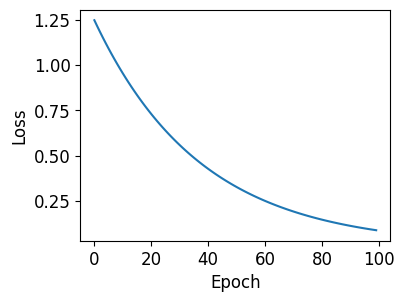

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 12

loss = history.history['loss']
plt.plot(loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

## 출력값 시각화하기

1/1 [==============================] - 0s 64ms/step
[[ 0.63214386  0.49673235 -1.0112109 ]]
[array([[ 0.63214386,  0.49673235, -1.0112109 ]], dtype=float32)]


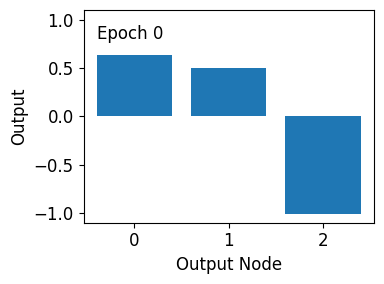

1/1 [==============================] - 0s 58ms/step


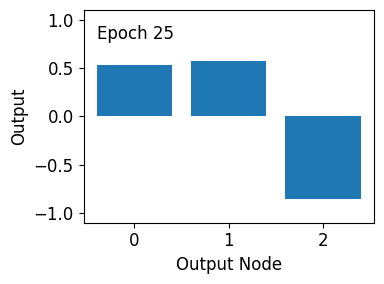

1/1 [==============================] - 0s 42ms/step


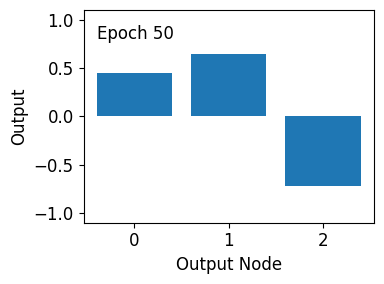

1/1 [==============================] - 0s 44ms/step


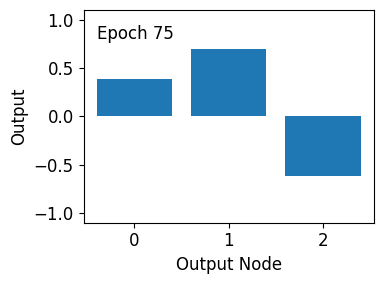

1/1 [==============================] - 0s 83ms/step


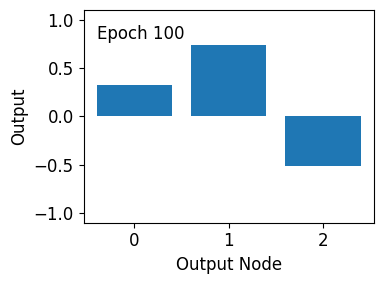

1/1 [==============================] - 0s 40ms/step


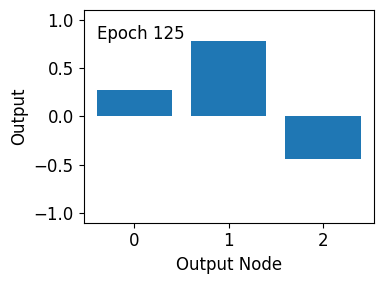

1/1 [==============================] - 0s 44ms/step


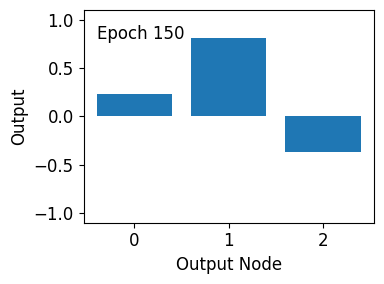

1/1 [==============================] - 0s 38ms/step


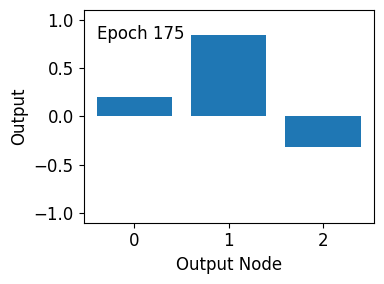

1/1 [==============================] - 0s 43ms/step


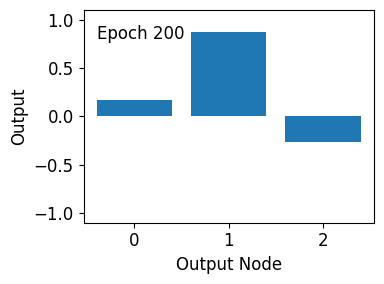

1/1 [==============================] - 0s 37ms/step


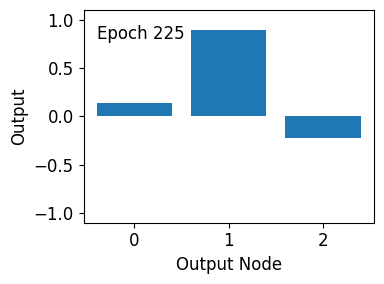

1/1 [==============================] - 0s 41ms/step


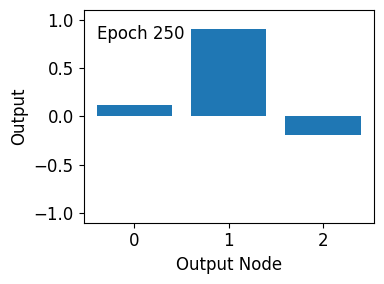

1/1 [==============================] - 0s 61ms/step


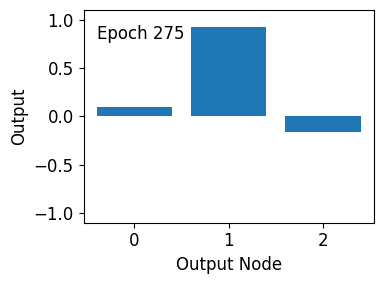

1/1 [==============================] - 0s 41ms/step


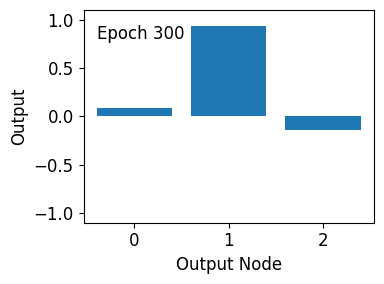

1/1 [==============================] - 0s 43ms/step


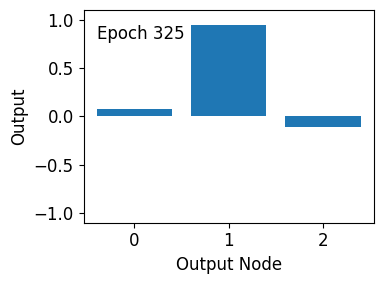

1/1 [==============================] - 0s 59ms/step


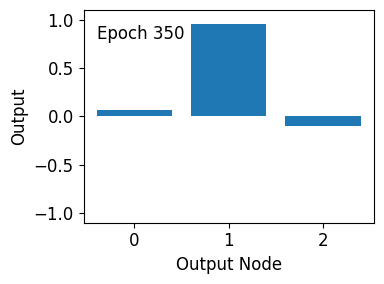

1/1 [==============================] - 0s 66ms/step


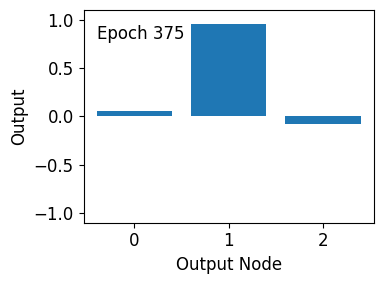

1/1 [==============================] - 0s 43ms/step


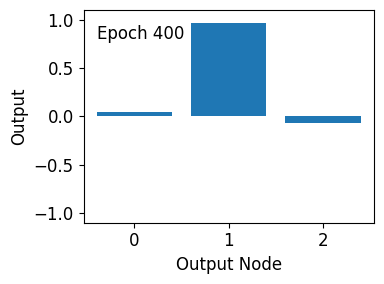

1/1 [==============================] - 0s 49ms/step


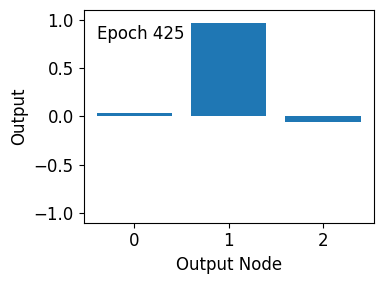

1/1 [==============================] - 0s 164ms/step


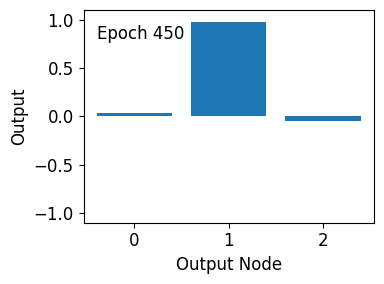

1/1 [==============================] - 0s 38ms/step


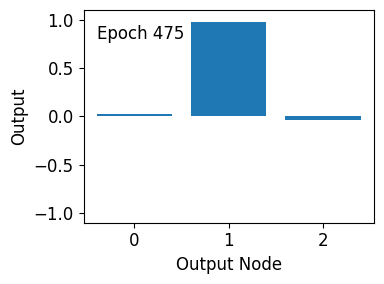

1/1 [==============================] - 0s 71ms/step


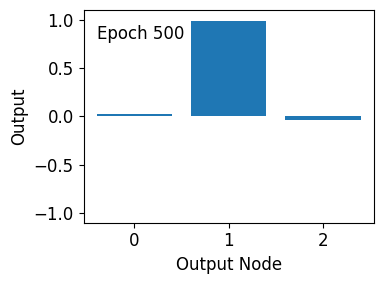

[[ 0.02230082  0.9822458  -0.03567355]]
[array([[ 0.02230082,  0.9822458 , -0.03567355]], dtype=float32)]


<Figure size 400x300 with 0 Axes>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 12

tf.random.set_seed(0)

# Modify the code to display the plots directly

# Initialize the model
model = keras.Sequential([keras.layers.Dense(units=3, input_shape=[1], use_bias=False)])
model.compile(loss='mse', optimizer='SGD')

# Initial prediction and plot
pred = model.predict([1])
print(pred)
print(model.get_weights())

plt.bar(np.arange(3), pred[0])
plt.ylim(-1.1, 1.1)
plt.xlabel('Output Node')
plt.ylabel('Output')
plt.text(-0.4, 0.8, 'Epoch 0')
plt.tight_layout()
plt.show()  # Display the plot
plt.clf()  # Clear the figure

# Training and plotting at intervals
epochs = 500
for i in range(1, epochs+1):
    model.fit([1], [[0, 1, 0]], epochs=1, verbose=0)
    pred = model.predict([1])

    if i % 25 == 0:
        plt.bar(np.arange(3), pred[0])
        plt.ylim(-1.1, 1.1)
        plt.xlabel('Output Node')
        plt.ylabel('Output')
        plt.text(-0.4, 0.8, 'Epoch ' + str(i))
        plt.tight_layout()
        plt.show()  # Display the plot
        plt.clf()  # Clear the figure

# Print final predictions and weights
print(pred)
print(model.get_weights())

## 옵티마이저 비교하기

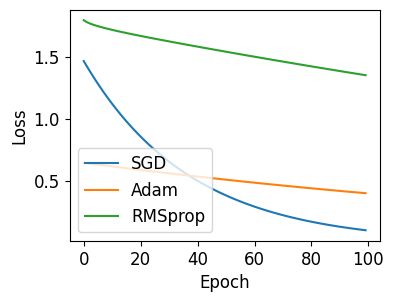

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 12

tf.random.set_seed(0)
model = keras.Sequential([keras.layers.Dense(units=3, input_shape=[1])])

tf.random.set_seed(0)
model2 = tf.keras.models.clone_model(model)

tf.random.set_seed(0)
model3 = tf.keras.models.clone_model(model)

model.compile(loss='mse', optimizer='SGD')
model2.compile(loss='mse', optimizer='Adam')
model3.compile(loss='mse', optimizer='RMSprop')

history = model.fit([1], [[0, 1, 0]], epochs=100, verbose=0)
history2 = model2.fit([1], [[0, 1, 0]], epochs=100, verbose=0)
history3 = model3.fit([1], [[0, 1, 0]], epochs=100, verbose=0)

loss = history.history['loss']
loss2 = history2.history['loss']
loss3 = history3.history['loss']
plt.plot(loss, label='SGD')
plt.plot(loss2, label='Adam')
plt.plot(loss3, label='RMSprop')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower left')
plt.show()

# 최소 제곱

최소제곱법(method of least squares)은 다음과 같이 구할 수 있어요. 가진 정보값 x(공부시간)과 y(성적)일때 이를 이용해 기울기 a에 대한 그림처럼 기울기의 값을 구한다고 한다면

`a = (x - x평균)(y - y평균)의 합 / (x - x평균) ** 2 의 합`

In [ ]:
# 주어진 데이터
시간 = [2, 4, 6, 8]
점수 = [80, 90, 88, 92]

# 최소제곱법에 따라 기울기와 절편을 계산합니다

n = len(시간)

# 각 항목의 합을 계산합니다
sum_x = sum(시간)
sum_y = sum(점수)
sum_xy = sum(x*y for x, y in zip(시간, 점수))
sum_x_squared = sum(x**2 for x in 시간)

# 기울기와 절편을 계산합니다
m_least_squares = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x**2)
b_least_squares = (sum_y - m_least_squares * sum_x) / n

m_least_squares, b_least_squares

(1.7, 79.0)

## 평균 제곱 오차

In [ ]:
# 예측된 점수를 계산합니다
예측된_점수 = [m_least_squares * t + b_least_squares for t in 시간]

# 평균 제곱 오차를 계산합니다
MSE = sum((y_pred - y_true)**2 for y_pred, y_true in zip(예측된_점수, 점수)) / n

MSE

6.300000000000013

## 경사 하강법

기울기를 조금씩 바꿔보면서 오차가 어떻게 변하는지를 살펴보고 계속 낮아지는쪽으로 변경하는 것

epoch=0, 기울기=26.7600, 절편=5.2500
epoch=50, 기울기=9.4967, 절편=32.4952
epoch=100, 기울기=6.4800, 절편=50.4752
epoch=150, 기울기=4.6319, 절편=61.5039
epoch=200, 기울기=3.4983, 절편=68.2685
epoch=250, 기울기=2.8030, 절편=72.4177
epoch=300, 기울기=2.3765, 절편=74.9627
epoch=350, 기울기=2.1150, 절편=76.5236
epoch=400, 기울기=1.9545, 절편=77.4811
epoch=450, 기울기=1.8561, 절편=78.0684
epoch=500, 기울기=1.7958, 절편=78.4286
epoch=550, 기울기=1.7587, 절편=78.6495
epoch=600, 기울기=1.7360, 절편=78.7850
epoch=650, 기울기=1.7221, 절편=78.8681
epoch=700, 기울기=1.7136, 절편=78.9191
epoch=750, 기울기=1.7083, 절편=78.9504
epoch=800, 기울기=1.7051, 절편=78.9696
epoch=850, 기울기=1.7031, 절편=78.9813
epoch=900, 기울기=1.7019, 절편=78.9886
epoch=950, 기울기=1.7012, 절편=78.9930


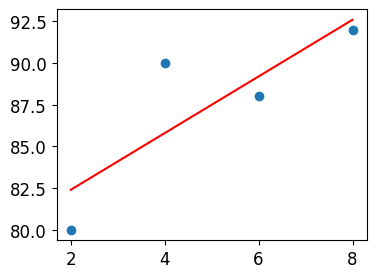

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([2, 4, 6, 8]) # 공부 시간
y = np.array([80, 90, 88, 92]) # 성적

a = 0
b = 0
lr = 0.03 # 학습률
epochs = 1000
n = len(x)

# 경사 하강법
for i in range(epochs):   # epoch 수 만큼 반복
    y_pred = a * x + b    # 예측 값을 구하는 식입니다.
    error = y - y_pred    # 실제 값과 비교한 오차를 error로 놓습니다.

    a_diff = (2/n) * sum(-x * (error))   # 오차 함수를 a로 편미분한 값입니다.
    b_diff = (2/n) * sum(-(error))       # 오차 함수를 b로 편미분한 값입니다.

    a = a - lr * a_diff    # 학습률을 곱해 기존의 a 값을 업데이트합니다.
    b = b - lr * b_diff    # 학습률을 곱해 기존의 b 값을 업데이트합니다.

    if i % 50 == 0:        # 100번 반복될 때마다 현재의 a 값, b 값을 출력합니다.
        print("epoch=%.f, 기울기=%.04f, 절편=%.04f" % (i, a, b))

# 앞서 구한 최종 a값을 기울기, b값을 y절편에 대입하여 그래프를 그립니다.
y_pred = a * x + b

plt.scatter(x, y)
plt.plot(x, y_pred,'r')
plt.show()

# 다중 선형 회귀

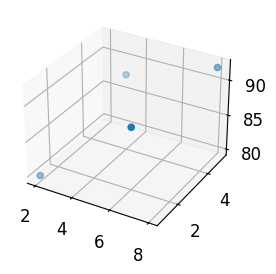

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 공부 시간 x1과 과외 시간 x2, 그성적 y의 넘파이 배열을 만듭니다.
x1 = np.array([2, 4, 6, 8])
x2 = np.array([1, 4, 2, 5])
y = np.array([80, 90, 88, 92])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x1, x2, y)
plt.show()

In [ ]:
# 기울기 a와 절편 b의 값을 초기화합니다.
a1 = 0
a2 = 0
b = 0
lr = 0.01
epochs = 1000
n=len(x1)

# 경사 하강법
for i in range(epochs):  # epoch 수 만큼 반복

    y_pred = a1 * x1 + a2 * x2 + b       # 예측 값을 구하는 식을 세웁니다
    error = y - y_pred                   # 실제 값과 비교한 오차를 error로 놓습니다.

    a1_diff = (2/n) * sum(-x1 * (error)) # 오차함수를 a1로 편미분한 값입니다.
    a2_diff = (2/n) * sum(-x2 * (error)) # 오차함수를 a2로 편미분한 값입니다.
    b_diff = (2/n) * sum(-(error))       # 오차함수를 b로 편미분한 값입니다.

    a1 = a1 - lr * a1_diff  # 학습률을 곱해 기존의 a1 값을 업데이트합니다.
    a2 = a2 - lr * a2_diff  # 학습률을 곱해 기존의 a2 값을 업데이트합니다.
    b = b - lr * b_diff     # 학습률을 곱해 기존의 b 값을 업데이트합니다.

    if i % 50 == 0:        # 100번 반복될 때마다 현재의 a1, a2, b 값을 출력합니다.
        print("epoch=%.f, 기울기1=%.04f, 기울기2=%.04f, 절편=%.04f" % (i, a1, a2, b))

# 실제 점수와 예측 된 점수를 출력합니다.
print("실제 점수:", y)
print("예측 점수:", y_pred)

epoch=0, 기울기1=8.9200, 기울기2=5.3800, 절편=1.7500
epoch=50, 기울기1=9.2998, 기울기2=5.8517, 절편=13.1915
epoch=100, 기울기1=8.0474, 기울기2=5.2729, 절편=22.6907
epoch=150, 기울기1=6.9834, 기울기2=4.7701, 절편=30.7998
epoch=200, 기울기1=6.0773, 기울기2=4.3375, 절편=37.7223
epoch=250, 기울기1=5.3044, 기울기2=3.9669, 절편=43.6316
epoch=300, 기울기1=4.6450, 기울기2=3.6501, 절편=48.6761
epoch=350, 기울기1=4.0822, 기울기2=3.3794, 절편=52.9823
epoch=400, 기울기1=3.6019, 기울기2=3.1483, 절편=56.6583
epoch=450, 기울기1=3.1918, 기울기2=2.9510, 절편=59.7963
epoch=500, 기울기1=2.8417, 기울기2=2.7826, 절편=62.4751
epoch=550, 기울기1=2.5429, 기울기2=2.6388, 절편=64.7618
epoch=600, 기울기1=2.2878, 기울기2=2.5160, 절편=66.7139
epoch=650, 기울기1=2.0701, 기울기2=2.4112, 절편=68.3803
epoch=700, 기울기1=1.8842, 기울기2=2.3218, 절편=69.8028
epoch=750, 기울기1=1.7255, 기울기2=2.2454, 절편=71.0171
epoch=800, 기울기1=1.5901, 기울기2=2.1802, 절편=72.0537
epoch=850, 기울기1=1.4745, 기울기2=2.1246, 절편=72.9386
epoch=900, 기울기1=1.3757, 기울기2=2.0771, 절편=73.6939
epoch=950, 기울기1=1.2915, 기울기2=2.0365, 절편=74.3388
실제 점수: [80 90 88 92]
예측 점수: [79.3164838  87.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

x = np.array([[2, 1], [4, 4], [6, 2], [8, 5]])
y = np.array([80, 90, 88, 92])

model = Sequential()

model.add(Dense(1, input_dim=2, activation='linear'))
model.compile(loss='mse', optimizer='sgd')

model.fit(x, y, epochs=2000)

Epoch 1/2000
1/1 [==============================] - 0s 421ms/step - loss: 7101.9058
Epoch 2/2000
1/1 [==============================] - 0s 13ms/step - loss: 1120.2181
Epoch 3/2000
1/1 [==============================] - 0s 12ms/step - loss: 936.9472
Epoch 4/2000
1/1 [==============================] - 0s 12ms/step - loss: 925.8076
Epoch 5/2000
1/1 [==============================] - 0s 12ms/step - loss: 919.8130
Epoch 6/2000
1/1 [==============================] - 0s 11ms/step - loss: 914.0074
Epoch 7/2000
1/1 [==============================] - 0s 12ms/step - loss: 908.2435
Epoch 8/2000
1/1 [==============================] - 0s 14ms/step - loss: 902.5161
Epoch 9/2000
1/1 [==============================] - 0s 14ms/step - loss: 896.8256
Epoch 10/2000
1/1 [==============================] - 0s 12ms/step - loss: 891.1713
Epoch 11/2000
1/1 [==============================] - 0s 14ms/step - loss: 885.5532
Epoch 12/2000
1/1 [==============================] - 0s 14ms/step - loss: 879.9706
Epoch 13/2

1/1 [==============================] - 0s 122ms/step


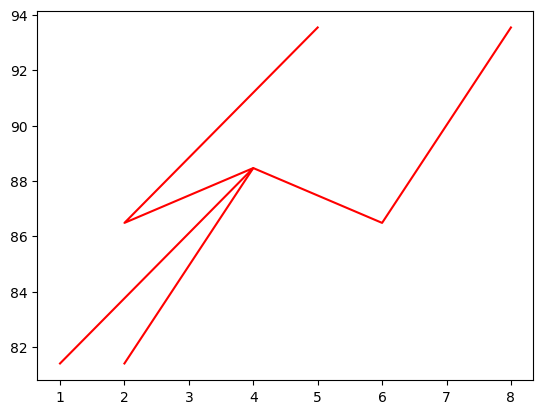

1/1 [==============================] - 0s 72ms/step
8시간을 공부하고 5시간의 과외를 받을 경우, 예상 점수는 93.55점입니다


In [ ]:
# plt.scatter(x, y)
plt.plot(x, model.predict(x), 'r')
plt.show()

hour = 8  # 학습 시간
private_class = 5  # 과외 시간
prediction = model.predict([[hour, private_class]])

print("%.f시간을 공부하고 %.f시간의 과외를 받을 경우, 예상 점수는 %.02f점입니다" % (hour, private_class, prediction))

# 로지스틱 회귀

In [ ]:
x = np.array([2, 4, 6, 8, 10, 12, 14])
y = np.array([0, 0, 0, 1, 1, 1, 1])

model = Sequential()
model.add(Dense(1, input_dim=1, activation='sigmoid'))

model.compile(optimizer='sgd', loss='binary_crossentropy')

model.fit(x, y, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 2s 2s/step - loss: 2.7021
Epoch 2/1000
1/1 [==============================] - 0s 21ms/step - loss: 2.6714
Epoch 3/1000
1/1 [==============================] - 0s 31ms/step - loss: 2.6407
Epoch 4/1000
1/1 [==============================] - 0s 24ms/step - loss: 2.6100
Epoch 5/1000
1/1 [==============================] - 0s 23ms/step - loss: 2.5793
Epoch 6/1000
1/1 [==============================] - 0s 15ms/step - loss: 2.5487
Epoch 7/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.5181
Epoch 8/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.4875
Epoch 9/1000
1/1 [==============================] - 0s 24ms/step - loss: 2.4569
Epoch 10/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.4264
Epoch 11/1000
1/1 [==============================] - 0s 24ms/step - loss: 2.3959
Epoch 12/1000
1/1 [==============================] - 0s 17ms/step - loss: 2.3654
Epoch 13/1000
1/1 [====================

1/1 [==============================] - 0s 28ms/step


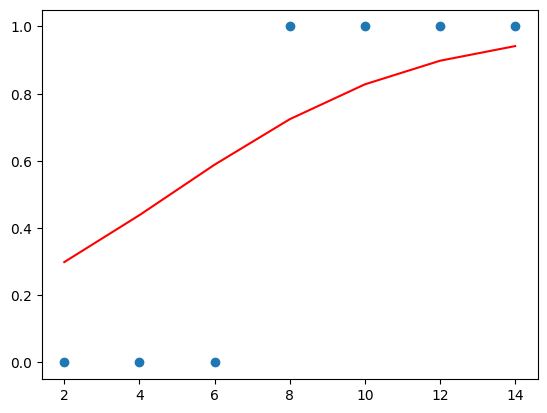

1/1 [==============================] - 0s 45ms/step
8시간을 공부할 경우, 합격 예상 확률은 0.7점입니다


In [ ]:
plt.scatter(x, y)
plt.plot(x, model.predict(x), 'r')
plt.show()

hour = 8  # 학습 시간
prediction = model.predict([hour])

print("%.f시간을 공부할 경우, 합격 예상 확률은 %.01f점입니다" % (hour, prediction))